# SGD

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
m = 100000
x = np.random.normal(size = m)

In [3]:
X = x.reshape(-1, 1)

In [4]:
y = 4.*x + 3.0 + np.random.normal(0, 3, size = m)

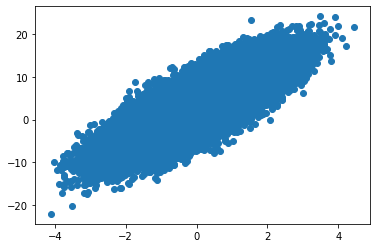

In [5]:
plt.scatter(x, y)
plt.show()

- BGD

In [6]:
def J(theta, X_b, y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/ len(X_b)
    except:
        return float('inf')  

In [7]:
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta)-y)*2. / len(X_b)

In [8]:
def gradient_descent( X_b, y,initial_theta, eta,n_iters=1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta*gradient
        if (abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon):
            break
        i_iter +=1
    return theta
def plot_theta_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='*')
    plt.show()

In [9]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 2.93 s


In [10]:
theta

array([3.00032958, 4.00513705])

- SGD

In [11]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2.*X_b_i.T.dot(X_b_i.dot(theta) - y_i)

In [12]:
def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [13]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=m//3 )

Wall time: 643 ms


In [14]:
theta

array([2.97194933, 4.04567156])